In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Dataframes/1-Combined_Data.csv')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming `df` is your DataFrame
print("Original DataFrame head:")
df.head()

Original DataFrame head:


,OpenTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,CloseTime,QuoteVolume,Count,TakerBuyVolume,TakerBuyQuoteVolume,Ignore
0,1514764800000,13715.65,13715.65,13400.01,13556.15,123.616013,1514765699999,1.675545e+06,1572,63.227133,8.576108e+05,0
1,1514765700000,13533.75,13550.87,13402.00,13521.12,98.136430,1514766599999,1.321757e+06,1461,47.686389,6.422812e+05,0
2,1514766600000,13500.00,13545.37,13450.00,13470.41,79.904037,1514767499999,1.078825e+06,1000,43.710406,5.900347e+05,0
3,1514767500000,13494.65,13690.87,13450.00,13529.01,141.699719,1514768399999,1.917783e+06,1195,73.897993,1.000614e+06,0
4,1514768400000,13528.99,13571.74,13402.28,13445.63,72.537533,1514769299999,9.778198e+05,898,34.257652,4.618369e+05,0


In [3]:
# Calculate the change in ClosePrice
df['PriceChange'] = df['ClosePrice'].diff()

# Define the margin as a percentage of the ClosePrice (e.g., 0.5%)
margin = df['ClosePrice'] * 0.005

# Generate labels: 0 for 'sell', 1 for 'buy', and -1 for 'hold'
df['Label'] = 0 # Initialize with zeros
df.loc[df['PriceChange'] > margin, 'Label'] = 1 # Set to 1 for 'buy'
df.loc[(-margin <= df['PriceChange']) & (df['PriceChange'] <= margin), 'Label'] = -1 # Set to -1 for 'hold'

# Drop the first row since it has NaN due to diff() operation
df = df.dropna()

print("\nDataFrame after adding labels and dropping NaNs:")
df[['ClosePrice', 'PriceChange', 'Label']].head()


DataFrame after adding labels and dropping NaNs:


,ClosePrice,PriceChange,Label
1,13521.12,-35.03,-1
2,13470.41,-50.71,-1
3,13529.01,58.60,-1
4,13445.63,-83.38,0
5,13560.00,114.37,1


In [4]:
# Select features and labels
features = df[['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume']].shift(1).dropna() # Use previous row's data
labels = df['Label'][1:] # Align labels with the shifted features

print("\nSelected features and labels for the model:")
print(features.head())
print(labels.head())


Selected features and labels for the model:
   OpenPrice  HighPrice  LowPrice  ClosePrice      Volume
2   13533.75   13550.87  13402.00    13521.12   98.136430
3   13500.00   13545.37  13450.00    13470.41   79.904037
4   13494.65   13690.87  13450.00    13529.01  141.699719
5   13528.99   13571.74  13402.28    13445.63   72.537533
6   13469.99   13595.89  13445.63    13560.00   87.861758
2   -1
3   -1
4    0
5    1
6    0
Name: Label, dtype: int64


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print("\nTraining and testing set sizes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training and testing set sizes:
X_train: (167840, 5), X_test: (41960, 5)


In [6]:
# Train the SVM model
model = SVC(kernel='rbf', C=1.0) # RBF kernel
model.fit(X_train_scaled, y_train)
print("\nModel training completed.")




Model training completed.


In [7]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Note: Depending on the distribution of your classes, you might need to adjust the class weight parameter


Classification report:
              precision    recall  f1-score   support

          -1       0.89      1.00      0.94     37543
           0       0.00      0.00      0.00      2261
           1       0.75      0.00      0.00      2156

    accuracy                           0.89     41960
   macro avg       0.55      0.33      0.32     41960
weighted avg       0.84      0.89      0.85     41960



C:\Users\Alp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[37542     0     1]
 [ 2261     0     0]
 [ 2153     0     3]]


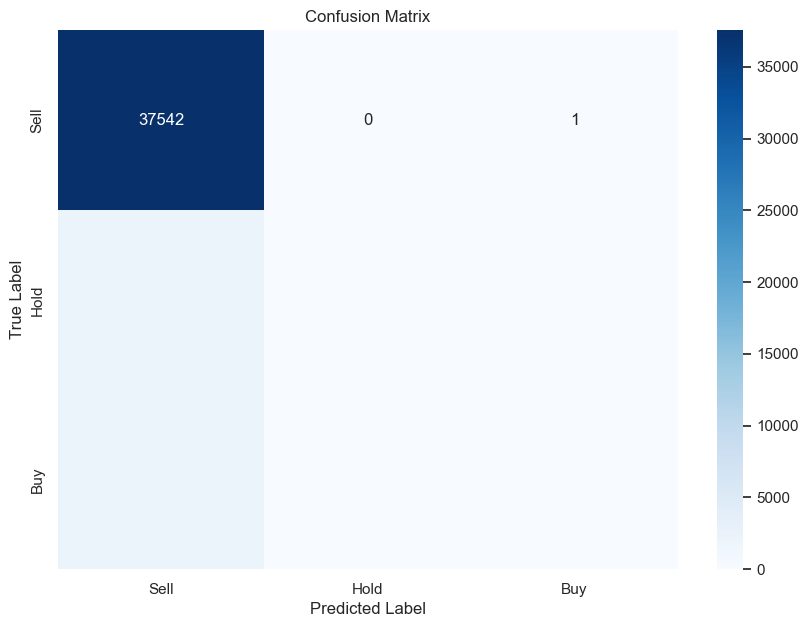

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # For a nicer styling of the plots

# Assuming you've already trained your model and made predictions (y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sell", "Hold", "Buy"], yticklabels=["Sell", "Hold", "Buy"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()